# Technical Indicators Section

This module was created to add technical indicators to extracted data, which will be used as predictors of the movement direction variable.

First, it is necessary to install the ta and mlpfinance libraries.

In [ ]:
#pip install ta

In [ ]:
#pip install mplfinance

In [ ]:
#pip install --upgrade pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
from datetime import datetime
import mplfinance as mplf

In [2]:
from ta import add_all_ta_features
from ta.utils import dropna
from ta.trend import sma_indicator, ema_indicator, adx, cci, macd
from ta.volume import force_index, money_flow_index, ease_of_movement
from ta.momentum import stoch, ppo, roc
from ta.volatility import average_true_range

In [3]:
path = 'C:/Users/abrah/Desktop/DISSERTATION/Data/'

In [4]:
#symbol = "EWW" #ETF replicating MEXICO IPC
#symbol = "AMXL.MX" #AMÉRICA MÓVIL MÉXICO
#symbol = "WALMEX.MX" #WALMART DE MEXICO
symbol = "GFNORTEO.MX" #GRUPO FINANCIERO BANORTE MÉXICO

In [5]:
df = pd.read_csv(path + symbol+'_last_month.csv', header = 0)
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,04/08/2022 08:30,112.690002,114.339996,112.419998,114.010002,114.010002,0
1,1,04/08/2022 08:31,113.860001,113.870003,113.040001,113.489998,113.489998,5360
2,2,04/08/2022 08:32,113.360001,113.510002,113.360001,113.470001,113.470001,1743
3,3,04/08/2022 08:33,113.760002,113.779999,113.660004,113.739998,113.739998,7222
4,4,04/08/2022 08:34,113.750000,113.989998,113.489998,113.849998,113.849998,13347
...,...,...,...,...,...,...,...,...
7886,383,01/09/2022 14:55,119.760002,120.010002,119.760002,120.000000,120.000000,42630
7887,384,01/09/2022 14:56,120.000000,120.110001,120.000000,120.099998,120.099998,41246
7888,385,01/09/2022 14:57,120.110001,120.139999,120.099998,120.129997,120.129997,45182
7889,386,01/09/2022 14:58,120.129997,120.169998,120.129997,120.150002,120.150002,48477


In [6]:
#useful for data extracted from Bloomberg
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y %H:%M')

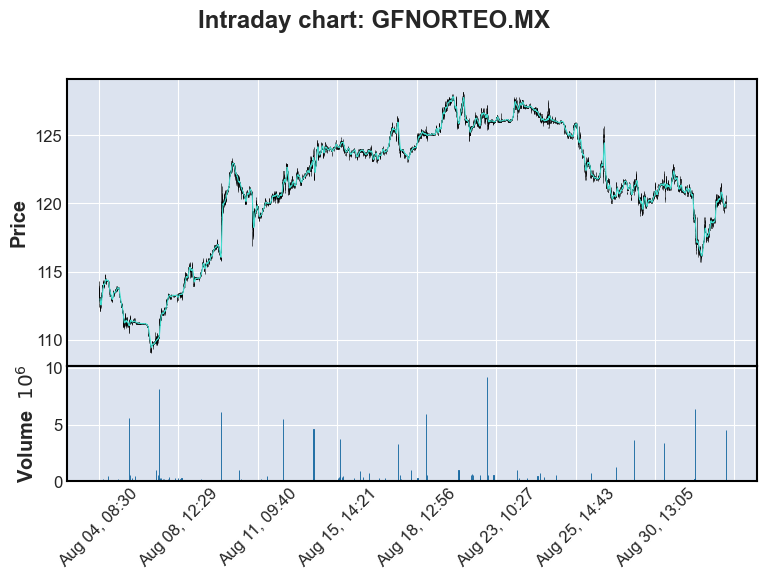

In [19]:
#Plotting data

data_plot=df.set_index('Date')
mplf.plot(data_plot,figratio=(20,12),
          title='Intraday chart: '+ symbol,
          type='candle',
          mav=(20),volume=True, warn_too_much_data=10000)

mplf.show()

mplf.plot(data_plot,figratio=(20,12),
          title='Intraday chart',
          type='candle',
          mav=(20),volume=True, warn_too_much_data=10000,savefig='C:/Users/abrah/Desktop/DISSERTATION/Graphs/'+symbol+'.jpg')

## Adding technical indicators

In this proposed work, will be calculated a set of 10 technical indicators that are best suited for intra-day trading and gives the best features or predictor through which the accuracy can be maximized, according (Kumar and Haider, 2021).

At the end, we add the variable to predict.

In [8]:
#Enviar el issue a la librería

def add_ti(df):
    
    df = df.copy()

    close = df["Close"]
    high = df["High"]
    low = df["Low"]
    volume = df["Volume"]
    
    df['Force Index'] = force_index(close, volume, window=13, fillna=False)
    df['Money Flow Index'] = money_flow_index(high, low, close, volume, window=14, fillna=False)
    #df['Ease of Movement'] = ease_of_movement(high, low, volume, window=14, fillna=False) 
    df['SMA 14'] = sma_indicator(close, window=14, fillna=False)
    df['EMA 14'] = ema_indicator(close, window=14, fillna=False)
    df['ADX'] = adx(high, low, close, window=14, fillna=False)
    df['CCI'] = cci(high, low, close, window=20, constant=0.015, fillna=False)
    df['Stochastic Oscilator'] = stoch(high, low, close, window=14, smooth_window=3, fillna=False)
    df['PPO'] = ppo(close, window_slow = 26, window_fast= 12, window_sign= 9, fillna= False)
    df['ROC'] = roc(close, window = 12, fillna= False) 
    df['ATR'] = average_true_range(high, low, close, window=14, fillna=False)
    df['Movement to Predict'] = close.pct_change().apply(lambda x: 0 if x <=0  else 1).shift(periods=-1)
    
    return(df)

### Preparing data

The following function run the add_ti function on each day, drop the NaN values and then add everyday to a final dataset. The reason to do this day by day is because the data in the opening of each day it is not necessarily related to the last rows of the previous day. 

In [9]:
def prepare_data(df):
    final_data = pd.DataFrame()
    for i in df['Date'].dt.day.unique():
        try:
            new_day = add_ti(df[df['Date'].dt.day == i]).dropna()
            final_data = final_data.append(new_day)
        except:
            pass
    final_data.to_csv(path + symbol+'_last_month_with_ti.csv')
    return(final_data)

In [10]:
data = prepare_data(df)

C:\Users\abrah\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\abrah\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [11]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Force Index,Money Flow Index,SMA 14,EMA 14,ADX,CCI,Stochastic Oscilator,PPO,ROC,ATR,Movement to Predict
25,25,2022-08-04 08:55:00,112.540001,112.970001,112.300003,112.650002,112.650002,41290,379.809452,54.413599,112.367143,112.562275,0.000000,-1.983233,63.333192,-0.261188,0.436874,0.294340,1.0
26,26,2022-08-04 08:56:00,112.650002,112.779999,112.650002,112.779999,112.779999,13677,579.547021,73.623292,112.393572,112.591305,0.000000,27.613339,77.777307,-0.223877,0.597626,0.282602,1.0
27,27,2022-08-04 08:57:00,112.739998,113.000000,112.739998,112.980003,112.980003,4515,625.757542,80.081545,112.452143,112.643131,16.130753,74.700992,97.826448,-0.177927,0.560752,0.280987,0.0
28,28,2022-08-04 08:58:00,112.940002,112.940002,112.940002,112.940002,112.940002,360,534.306417,85.836055,112.511429,112.682714,17.473453,93.210201,93.333616,-0.142735,0.507253,0.263774,1.0
29,29,2022-08-04 08:59:00,112.980003,113.349998,112.980003,113.239998,113.239998,5233,682.244936,85.867706,112.575000,112.757019,19.646052,159.105534,89.523706,-0.092314,0.792167,0.274218,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,382,2022-09-01 14:54:00,120.110001,120.120003,119.639999,119.760002,119.760002,52484,-1913.573905,67.331218,119.915000,119.929807,21.437172,-15.937340,22.222693,0.009675,-0.066751,0.158944,1.0
7886,383,2022-09-01 14:55:00,119.760002,120.010002,119.760002,120.000000,120.000000,42630,-178.619214,65.865295,119.926429,119.939166,22.228484,25.463944,66.666667,0.013040,0.166942,0.165448,1.0
7887,384,2022-09-01 14:56:00,120.000000,120.110001,120.000000,120.099998,120.099998,41246,436.117397,71.220018,119.945001,119.960610,22.247047,110.493300,85.184871,0.022176,0.275530,0.161487,1.0
7888,385,2022-09-01 14:57:00,120.110001,120.139999,120.099998,120.129997,120.129997,45182,567.444176,76.589966,119.968572,119.983195,22.055506,123.144440,90.740191,0.031075,0.216897,0.152810,1.0


In [12]:
data.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Force Index,Money Flow Index,SMA 14,EMA 14,ADX,CCI,Stochastic Oscilator,PPO,ROC,ATR,Movement to Predict
count,7345.00000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7.345000e+03,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000
mean,199.74241,121.245253,121.303916,121.189619,121.248392,121.248392,1.451534e+04,76.558093,50.336641,121.236107,121.236666,25.027099,7.000217,51.112468,0.007967,0.019346,0.131379,0.428591
std,101.57355,4.681135,4.681380,4.683289,4.683582,4.683582,4.449105e+04,2260.323612,20.598349,4.676842,4.676010,11.065401,110.354369,31.006495,0.094888,0.308730,0.071647,0.494908
min,25.00000,109.099998,109.209999,109.010002,109.080002,109.080002,0.000000e+00,-28291.299562,0.000000,109.361428,109.426038,0.000000,-569.511428,0.000000,-0.371751,-1.573631,0.014441,0.000000
25%,112.00000,119.750000,119.820000,119.690002,119.750000,119.750000,3.539000e+03,-233.207472,36.472272,119.751429,119.769075,17.172145,-71.245197,24.590389,-0.039431,-0.126987,0.081943,0.000000
50%,199.00000,121.900002,121.989998,121.860001,121.919998,121.919998,7.500000e+03,2.564654,49.569644,121.892143,121.897547,22.692526,7.469078,52.381471,0.006842,0.008080,0.117269,0.000000
75%,287.00000,125.029999,125.070000,125.010002,125.040001,125.040001,1.394500e+04,245.525576,64.563320,125.044999,125.038390,31.312928,83.320716,77.646731,0.058041,0.167978,0.163627,1.000000
max,388.00000,128.179993,128.199997,128.100006,128.149994,128.149994,1.230958e+06,59848.048631,100.000000,127.935714,127.895919,81.649041,593.486343,100.000000,0.383371,1.999025,0.737730,1.000000
